---
## 1. Environment Setup

This section detects the environment (Kaggle or local).

In [1]:
# Check if running on Kaggle
import os
try:
    if os.path.exists('/kaggle/input'):
        ON_KAGGLE = True
        print("✓ Running on Kaggle")
    else:
        ON_KAGGLE = False
        print("✓ Running on local environment")
except:
    ON_KAGGLE = False
    print("✓ Running on local environment")

✓ Running on Kaggle


In [2]:
# Kaggle dataset paths (if on Kaggle)
if ON_KAGGLE:
    print("✓ Kaggle environment detected")
    print("Datasets available at: /kaggle/input/")
else:
    print("Using local environment")

✓ Kaggle environment detected
Datasets available at: /kaggle/input/


---
## 2. Import Required Libraries

In [3]:
from pathlib import Path
import os

# Detect Kaggle
ON_KAGGLE = os.path.exists("/kaggle/input")

# Auto-detect dataset (robust)
if ON_KAGGLE:
    kaggle_input = Path("/kaggle/input")
    BASE_DATA_DIR = None

    for path in kaggle_input.rglob("*"):
        if path.is_dir():
            if (path / "train" / "images").exists() and (path / "train" / "masks").exists():
                BASE_DATA_DIR = path
                break

    if BASE_DATA_DIR is None:
        raise RuntimeError("❌ Dataset not found")
else:
    BASE_DATA_DIR = Path("dataset")

# Define paths
TRAIN_IMAGES = BASE_DATA_DIR / "train" / "images"
TRAIN_MASKS  = BASE_DATA_DIR / "train" / "masks"
VAL_IMAGES   = BASE_DATA_DIR / "val" / "images"
VAL_MASKS    = BASE_DATA_DIR / "val" / "masks"
TEST_IMAGES  = BASE_DATA_DIR / "test" / "images"
TEST_MASKS   = BASE_DATA_DIR / "test" / "masks"

print("✓ Dataset paths initialized")
print("Train images:", TRAIN_IMAGES)
print("Train masks :", TRAIN_MASKS)


✓ Dataset paths initialized
Train images: /kaggle/input/oilspill/oil_spill_dataset/train/images
Train masks : /kaggle/input/oilspill/oil_spill_dataset/train/masks


In [4]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['figure.dpi'] = 100

# Inline plotting
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


---
## 3. Load Dataset Paths

The dataset will be auto-detected from Kaggle input or local directory.

In [5]:
# ============================================================================
# DATASET PATH CONFIGURATION
# ============================================================================

import zipfile

# Auto-detect Kaggle dataset or use local path
if ON_KAGGLE:
    # Try to auto-detect dataset in /kaggle/input/
    kaggle_input = Path('/kaggle/input/')
    potential_datasets = [d for d in kaggle_input.iterdir() if d.is_dir()]
    
    # Look for a dataset with train/val/test structure
    BASE_DATA_DIR = None
    for dataset_dir in potential_datasets:
        if (dataset_dir / 'train').exists() or (dataset_dir / 'train' / 'images').exists():
            BASE_DATA_DIR = dataset_dir
            print(f"✓ Auto-detected dataset: {dataset_dir.name}")
            break
    
    # If nested, check subdirectories
    if BASE_DATA_DIR is None:
        for dataset_dir in potential_datasets:
            subdirs = [d for d in dataset_dir.iterdir() if d.is_dir()]
            for subdir in subdirs:
                if (subdir / 'train').exists() or (subdir / 'train' / 'images').exists():
                    BASE_DATA_DIR = subdir
                    print(f"✓ Auto-detected dataset in: {subdir}")
                    break
            if BASE_DATA_DIR:
                break
    
    if BASE_DATA_DIR is None:
        print("⚠ Could not auto-detect dataset. Using first available dataset.")
        BASE_DATA_DIR = potential_datasets[0] if potential_datasets else kaggle_input
else:
    BASE_DATA_DIR = Path('dataset')

print(f"\n🎯 Using BASE_DATA_DIR: {BASE_DATA_DIR}")

# Define splits
TRAIN_IMAGES = BASE_DATA_DIR / 'train' / 'images'
TRAIN_MASKS = BASE_DATA_DIR / 'train' / 'masks'
VAL_IMAGES = BASE_DATA_DIR / 'val' / 'images'
VAL_MASKS = BASE_DATA_DIR / 'val' / 'masks'
TEST_IMAGES = BASE_DATA_DIR / 'test' / 'images'
TEST_MASKS = BASE_DATA_DIR / 'test' / 'masks'

# Verify paths
print(f"\n✓ Training images: {TRAIN_IMAGES.exists()} ({TRAIN_IMAGES})")
print(f"✓ Training masks: {TRAIN_MASKS.exists()} ({TRAIN_MASKS})")

if not TRAIN_IMAGES.exists():
    print("\n⚠ Training directory not found!")

✓ Auto-detected dataset in: /kaggle/input/oilspill/oil_spill_dataset

🎯 Using BASE_DATA_DIR: /kaggle/input/oilspill/oil_spill_dataset

✓ Training images: True (/kaggle/input/oilspill/oil_spill_dataset/train/images)
✓ Training masks: True (/kaggle/input/oilspill/oil_spill_dataset/train/masks)


---
## 4. Display Multiple Random SAR Images

Let's visualize a variety of images from the training set to understand visual patterns.

Found 3848 images in /kaggle/input/oilspill/oil_spill_dataset/train/images


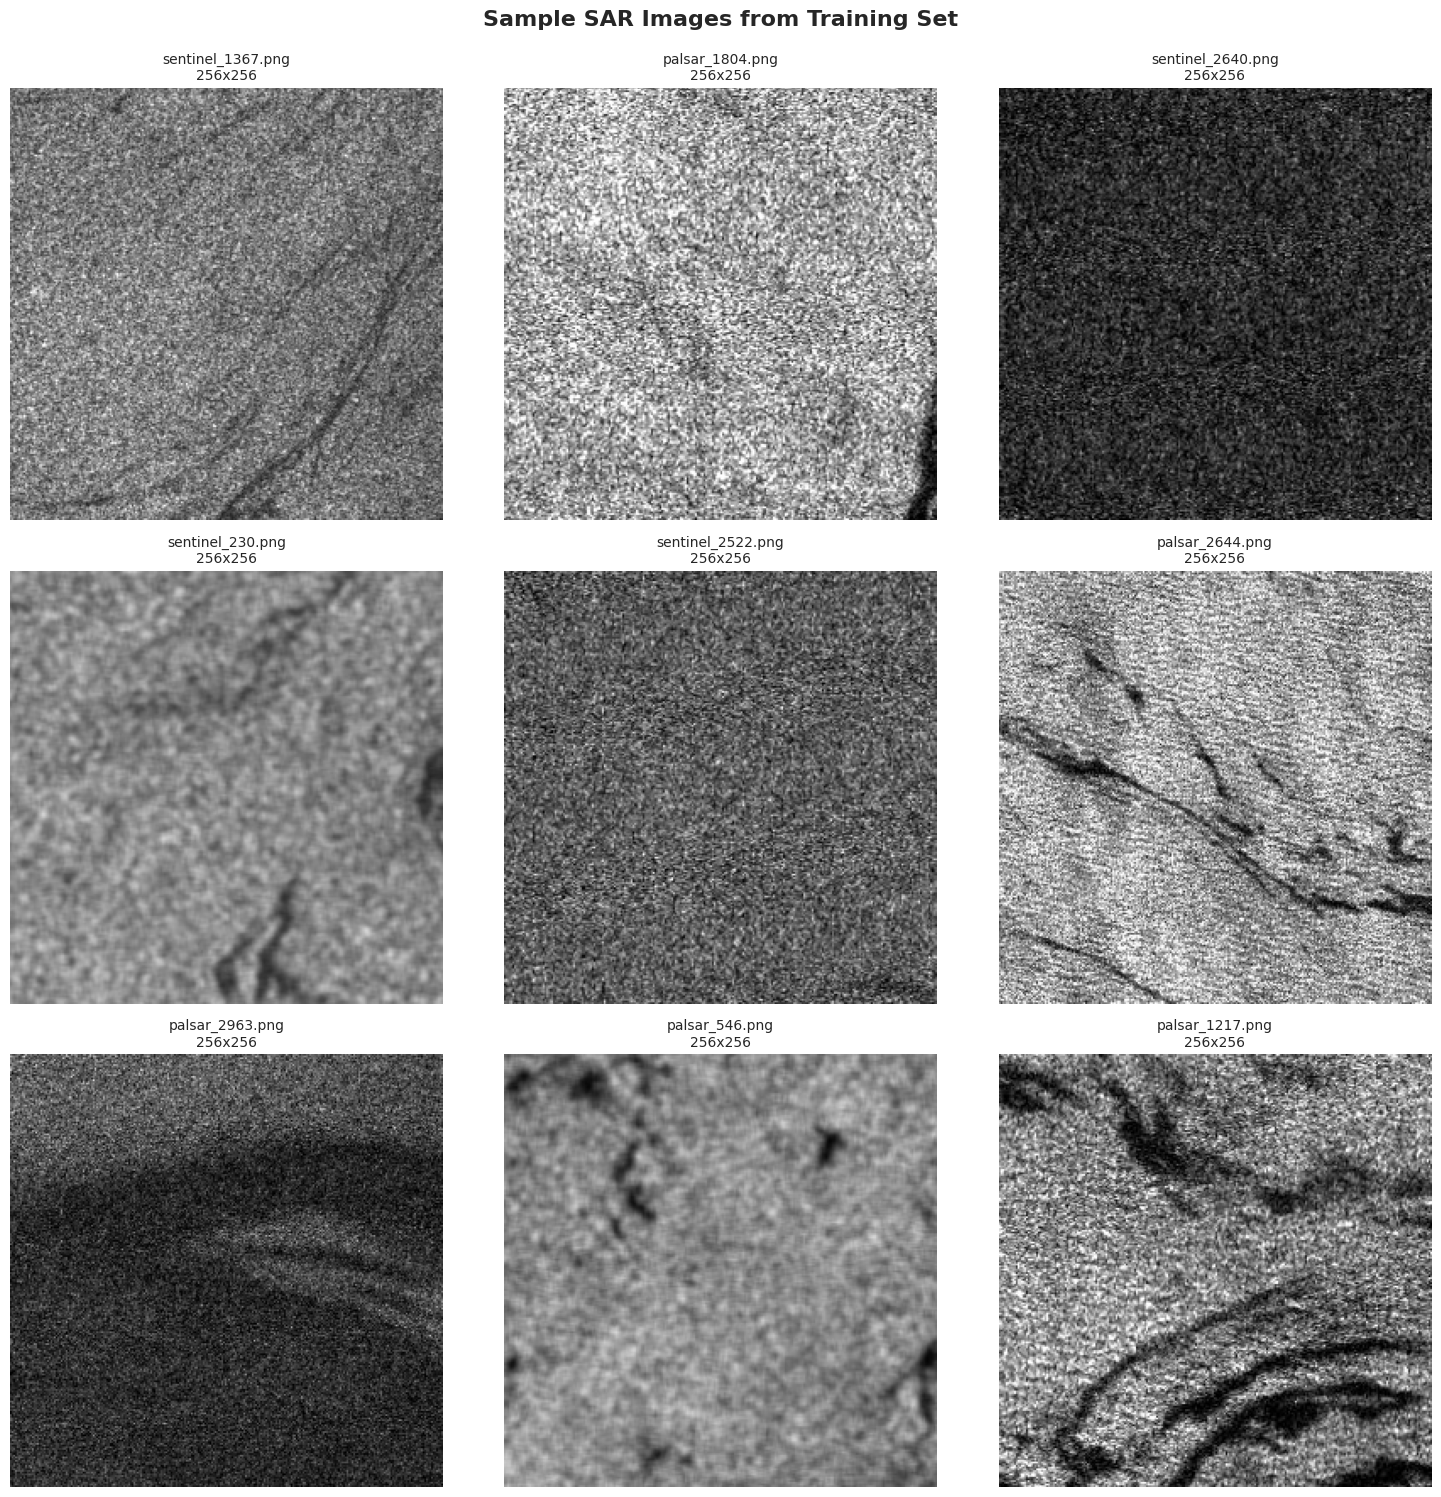


📸 Visual Observations:
  - Examine the variety in image quality
  - Notice differences in lighting and contrast
  - Identify common patterns or features


In [6]:
# Load and display random training images
if TRAIN_IMAGES.exists():
    # Check for all common image formats
    image_files = (list(TRAIN_IMAGES.glob('*.jpg')) + 
                   list(TRAIN_IMAGES.glob('*.jpeg')) + 
                   list(TRAIN_IMAGES.glob('*.png')))
    
    print(f"Found {len(image_files)} images in {TRAIN_IMAGES}")
    
    if len(image_files) >= 9:
        # Select 9 random images
        random_indices = np.random.choice(len(image_files), 9, replace=False)
        
        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        axes = axes.ravel()
        
        for idx, img_idx in enumerate(random_indices):
            img_path = image_files[img_idx]
            img = cv2.imread(str(img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            axes[idx].imshow(img_rgb)
            axes[idx].set_title(f'{img_path.name}\n{img_rgb.shape[1]}x{img_rgb.shape[0]}', fontsize=10)
            axes[idx].axis('off')
        
        plt.suptitle('Sample SAR Images from Training Set', fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()
        
        print("\n📸 Visual Observations:")
        print("  - Examine the variety in image quality")
        print("  - Notice differences in lighting and contrast")
        print("  - Identify common patterns or features")
    else:
        print(f"⚠ Only {len(image_files)} images found. Need at least 9 for grid display.")
        if len(image_files) == 0:
            print(f"\n📁 Checked directory: {TRAIN_IMAGES}")
            print("   Ensure your dataset is properly extracted and contains .jpg, .jpeg, or .png files")
else:
    print("⚠ Training images directory not found.")
    print(f"   Expected location: {TRAIN_IMAGES}")

---
## 5. Display Corresponding Masks

Visualize masks to understand oil spill patterns and distribution.

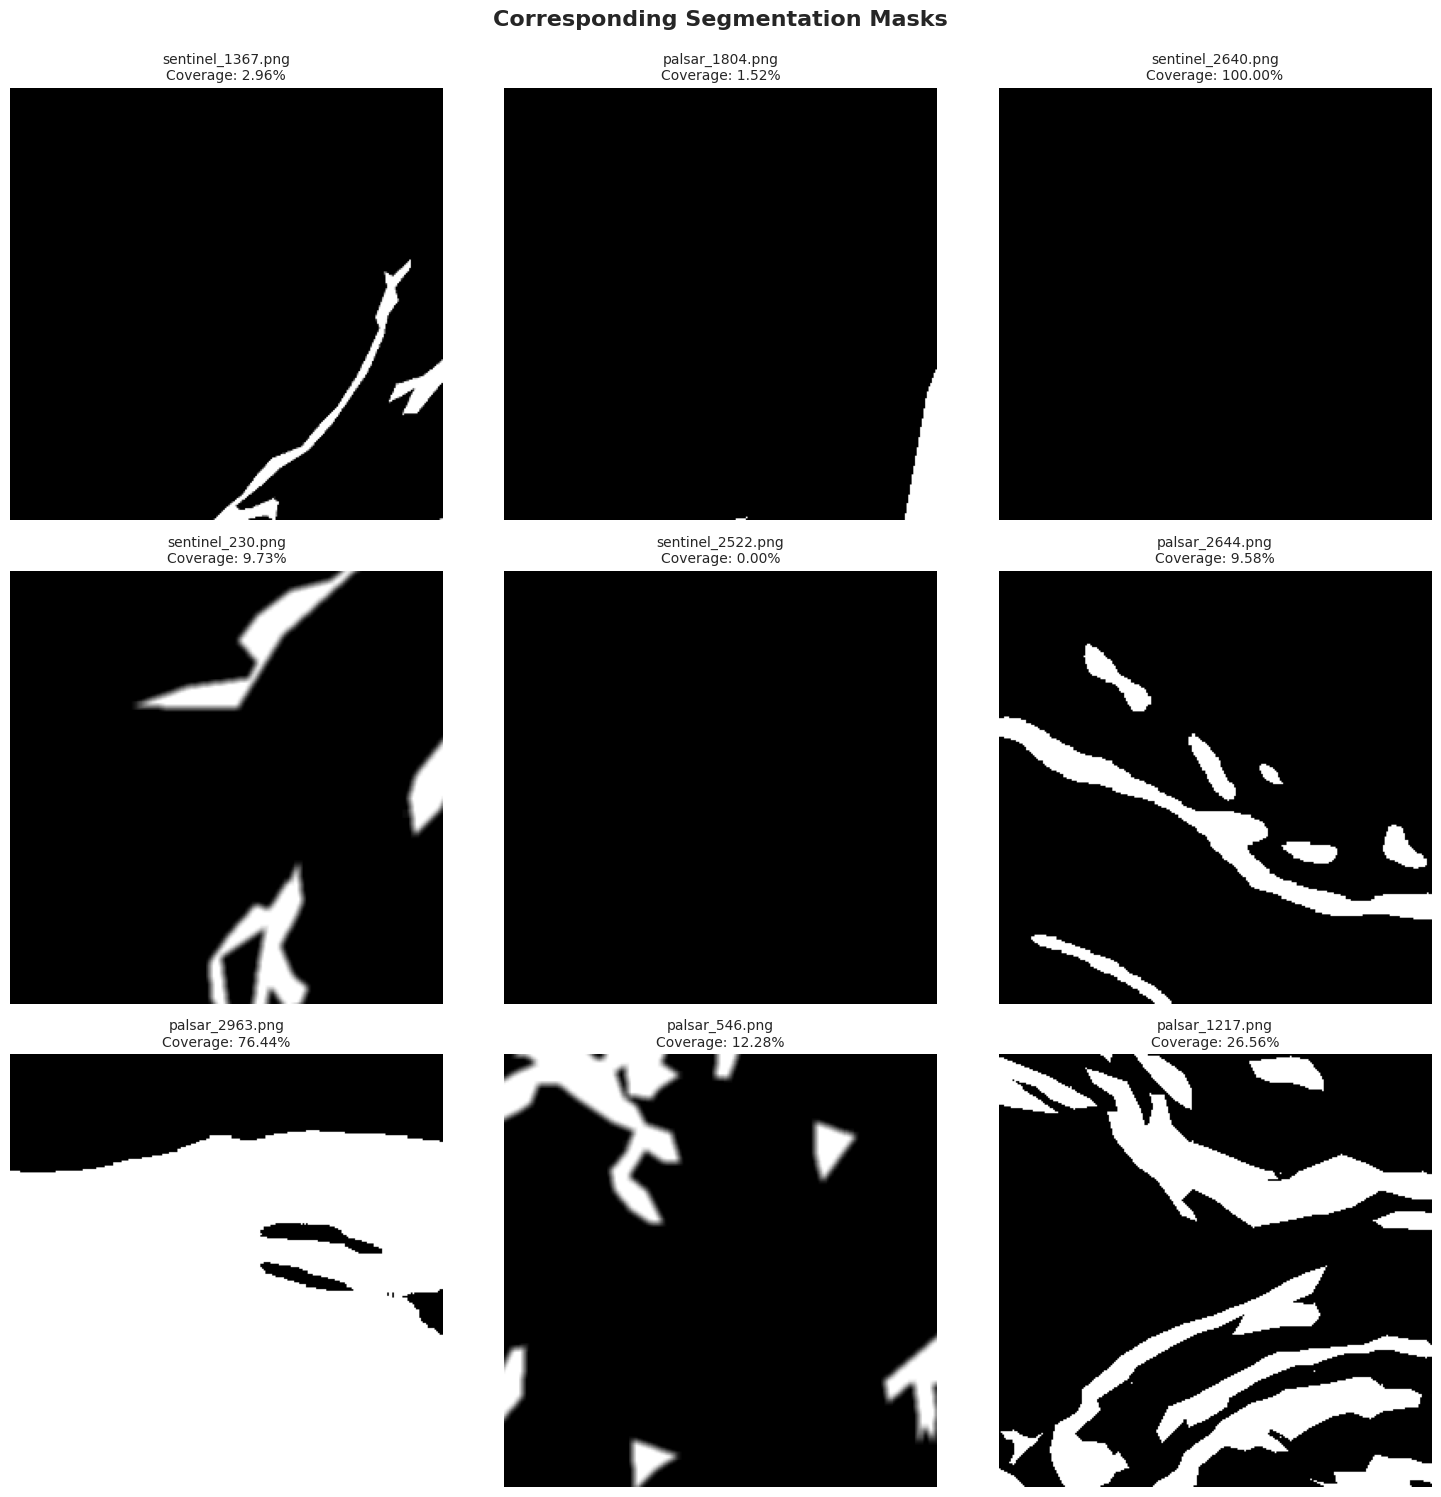


🎭 Mask Observations:
  - White areas indicate oil spills
  - Black areas represent clean water
  - Coverage % shows proportion of oil spill in image


In [7]:
# Display corresponding masks
if TRAIN_MASKS.exists() and 'image_files' in locals():
    mask_files = list(TRAIN_MASKS.glob('*.png'))
    
    if len(mask_files) >= 9:
        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        axes = axes.ravel()
        
        for idx, img_idx in enumerate(random_indices):
            # Try to find corresponding mask
            img_name = image_files[img_idx].stem
            mask_path = TRAIN_MASKS / f"{img_name}.png"
            
            if mask_path.exists():
                mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
                
                # Calculate coverage
                coverage = (np.sum(mask > 0) / mask.size) * 100
                
                axes[idx].imshow(mask, cmap='gray')
                axes[idx].set_title(f'{mask_path.name}\nCoverage: {coverage:.2f}%', fontsize=10)
                axes[idx].axis('off')
            else:
                axes[idx].text(0.5, 0.5, 'Mask Not Found', ha='center', va='center')
                axes[idx].axis('off')
        
        plt.suptitle('Corresponding Segmentation Masks', fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()
        
        print("\n🎭 Mask Observations:")
        print("  - White areas indicate oil spills")
        print("  - Black areas represent clean water")
        print("  - Coverage % shows proportion of oil spill in image")
else:
    print("⚠ Training masks directory not found.")

---
## 6. Pixel Intensity Distribution Analysis

Analyze pixel value distributions to understand image characteristics.

Analyzing pixel intensity distribution...


Loading images: 100%|██████████| 20/20 [00:00<00:00, 58.31it/s]


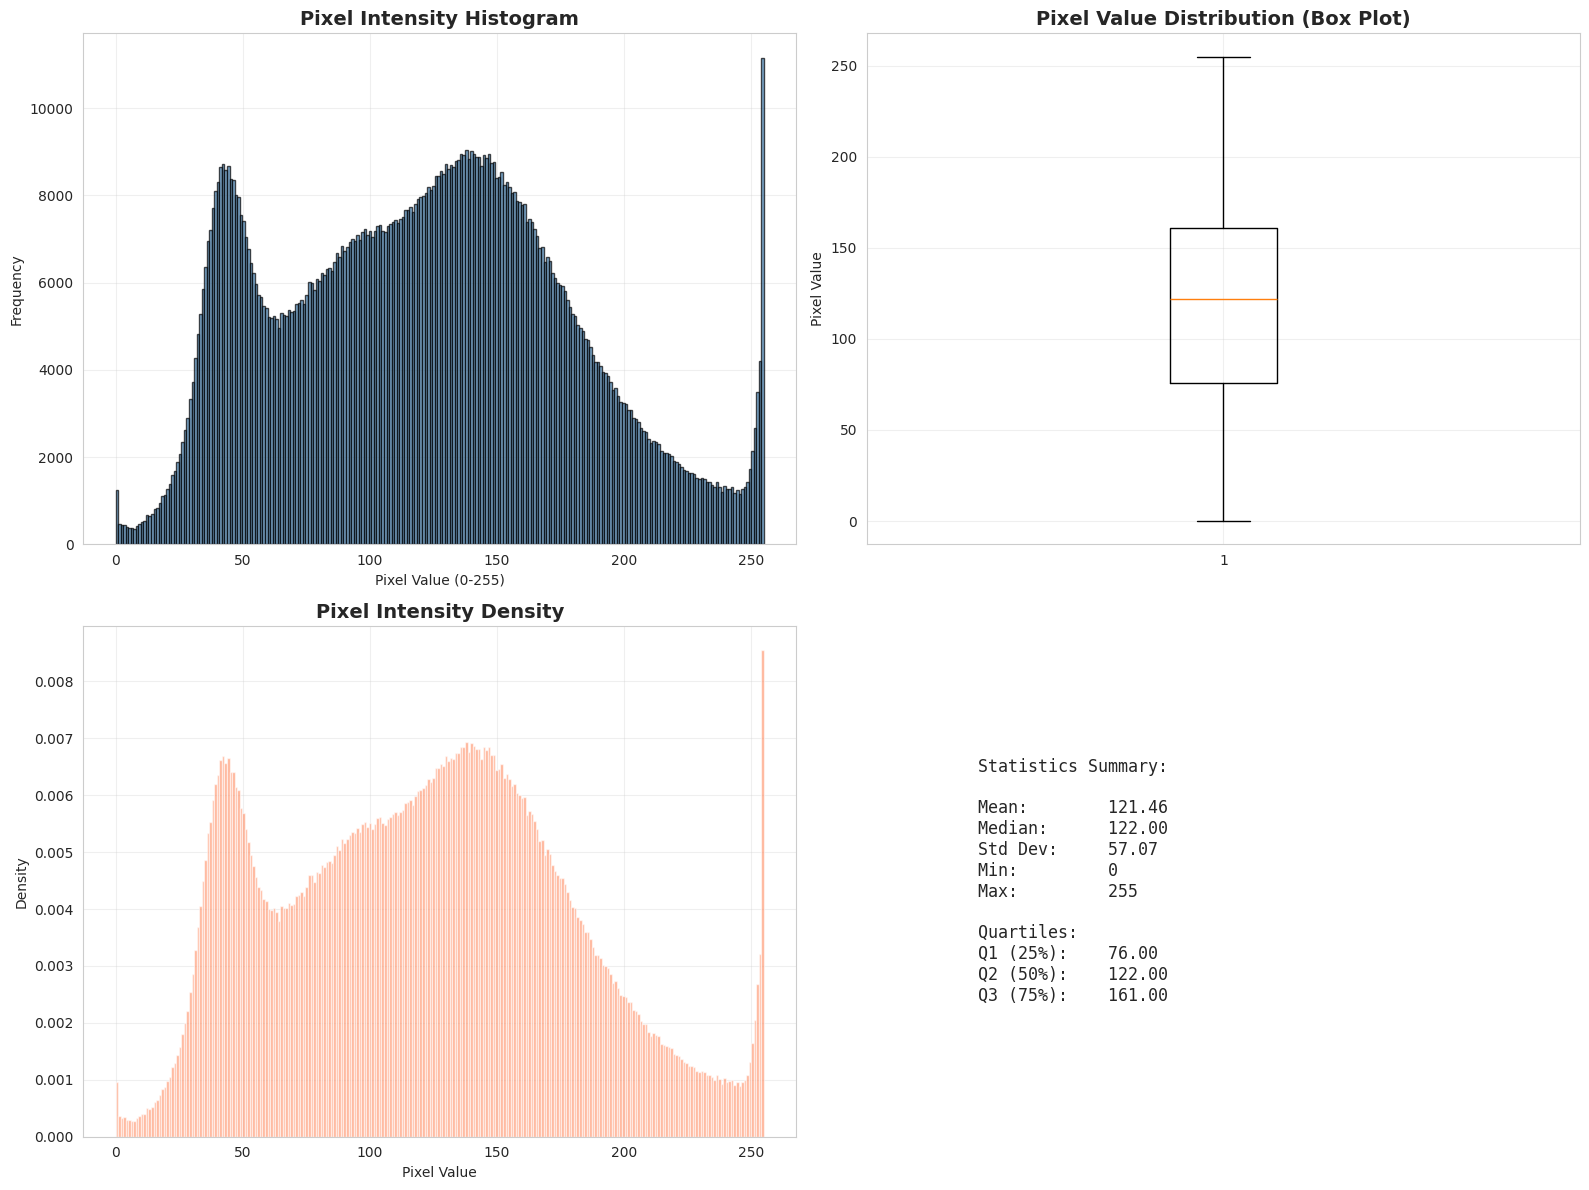


📊 Intensity Analysis Complete!
   Analyzed 20 images
   Total pixels: 1,310,720


In [8]:
# Analyze pixel intensity distribution
if TRAIN_IMAGES.exists():
    image_files = (list(TRAIN_IMAGES.glob('*.jpg')) + 
                   list(TRAIN_IMAGES.glob('*.jpeg')) +
                   list(TRAIN_IMAGES.glob('*.png')))
    
    if len(image_files) == 0:
        print("⚠ No image files found in training directory.")
        print(f"   Checked: {TRAIN_IMAGES}")
        print("   Please ensure dataset is available before running EDA.")
    else:
        # Sample 20 images for analysis
        sample_size = min(20, len(image_files))
        sampled_files = np.random.choice(image_files, sample_size, replace=False)
        
        all_pixel_values = []
        
        print("Analyzing pixel intensity distribution...")
        for img_path in tqdm(sampled_files, desc="Loading images"):
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                all_pixel_values.extend(img.flatten())
        
        if len(all_pixel_values) == 0:
            print("⚠ Could not load any images successfully.")
        else:
            all_pixel_values = np.array(all_pixel_values)
    
            # Create comprehensive visualization
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            
            # Histogram
            axes[0, 0].hist(all_pixel_values, bins=256, color='steelblue', edgecolor='black', alpha=0.7)
            axes[0, 0].set_title('Pixel Intensity Histogram', fontsize=14, fontweight='bold')
            axes[0, 0].set_xlabel('Pixel Value (0-255)')
            axes[0, 0].set_ylabel('Frequency')
            axes[0, 0].grid(True, alpha=0.3)
            
            # Box plot
            axes[0, 1].boxplot(all_pixel_values, vert=True)
            axes[0, 1].set_title('Pixel Value Distribution (Box Plot)', fontsize=14, fontweight='bold')
            axes[0, 1].set_ylabel('Pixel Value')
            axes[0, 1].grid(True, alpha=0.3)
            
            # Density plot
            axes[1, 0].hist(all_pixel_values, bins=256, density=True, color='coral', alpha=0.6)
            axes[1, 0].set_title('Pixel Intensity Density', fontsize=14, fontweight='bold')
            axes[1, 0].set_xlabel('Pixel Value')
            axes[1, 0].set_ylabel('Density')
            axes[1, 0].grid(True, alpha=0.3)
            
            # Statistics table
            stats_text = f"""
    Statistics Summary:
    
    Mean:        {np.mean(all_pixel_values):.2f}
    Median:      {np.median(all_pixel_values):.2f}
    Std Dev:     {np.std(all_pixel_values):.2f}
    Min:         {np.min(all_pixel_values)}
    Max:         {np.max(all_pixel_values)}
    
    Quartiles:
    Q1 (25%):    {np.percentile(all_pixel_values, 25):.2f}
    Q2 (50%):    {np.percentile(all_pixel_values, 50):.2f}
    Q3 (75%):    {np.percentile(all_pixel_values, 75):.2f}
    """
            axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, family='monospace',
                            verticalalignment='center')
            axes[1, 1].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            print("\n📊 Intensity Analysis Complete!")
            print(f"   Analyzed {sample_size} images")
            print(f"   Total pixels: {len(all_pixel_values):,}")
else:
    print("⚠ Training images not found.")

---
## 7. Detailed Image Statistics

Compute per-image statistics to identify outliers.

Computing per-image statistics...


Processing: 100%|██████████| 50/50 [00:00<00:00, 82.31it/s]



IMAGE STATISTICS SUMMARY (First 50 images)
       Width  Height        Mean        Std       Min         Max
count   50.0    50.0   50.000000  50.000000  50.00000   50.000000
mean   256.0   256.0  106.730588  41.899981   4.14000  238.120000
std      0.0     0.0   34.102932  14.420045   9.20295   29.019093
min    256.0   256.0   40.113281  11.610747   0.00000  131.000000
25%    256.0   256.0   79.477226  30.945939   0.00000  233.500000
50%    256.0   256.0  107.204628  42.486281   0.00000  255.000000
75%    256.0   256.0  131.348667  54.831068   3.25000  255.000000
max    256.0   256.0  173.828384  71.564115  38.00000  255.000000


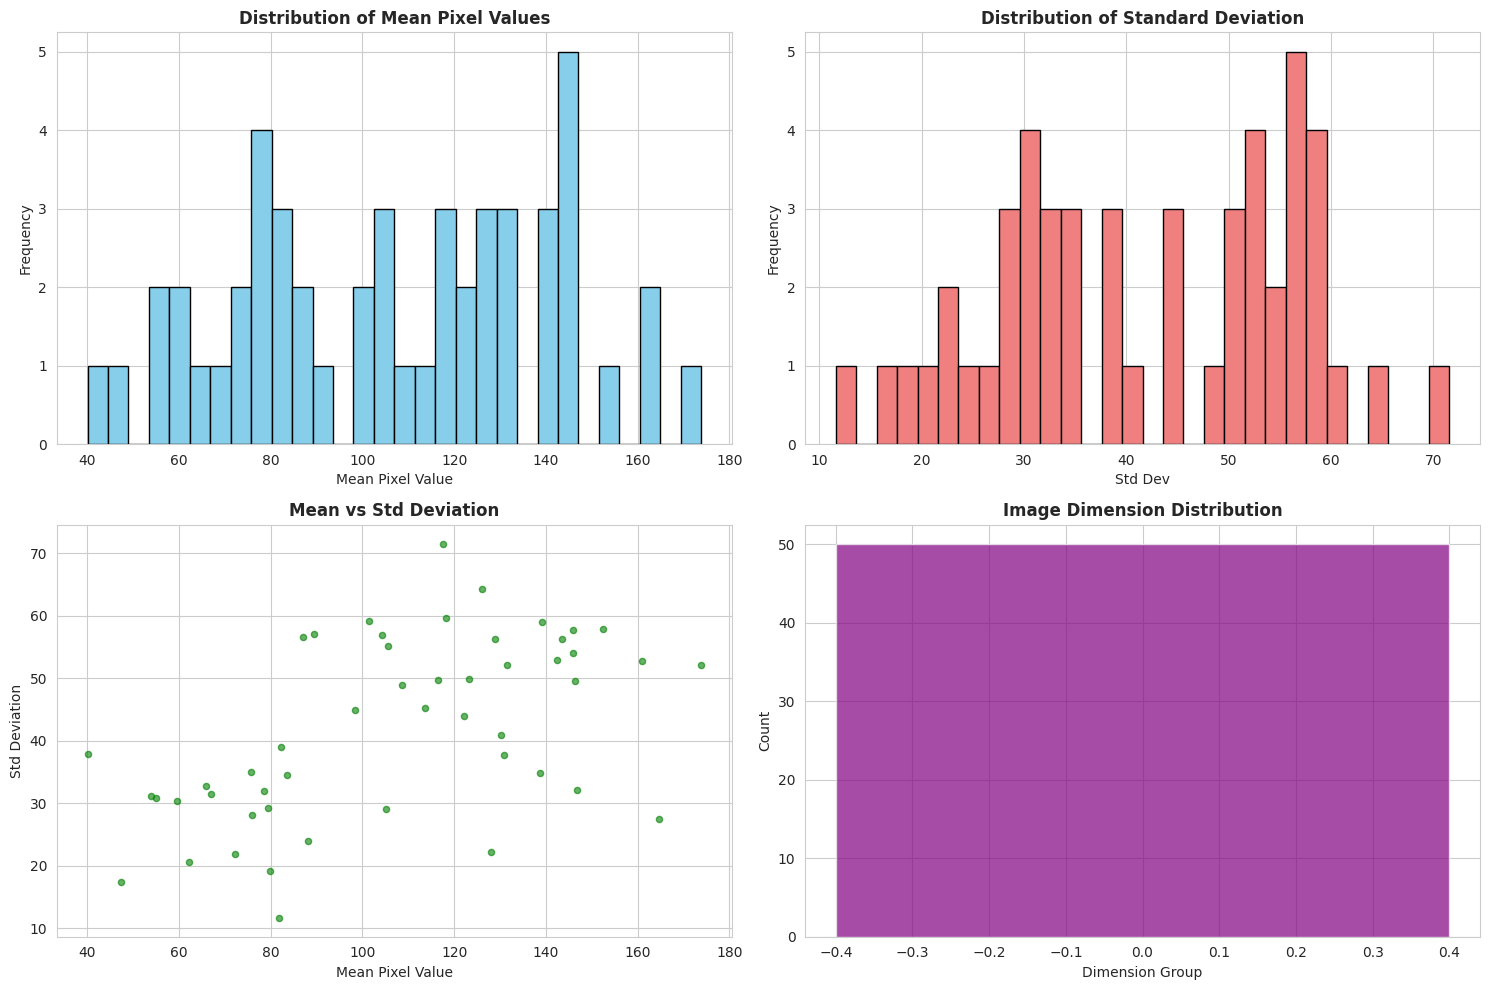

In [9]:
# Compute detailed statistics for each image
if TRAIN_IMAGES.exists():
    image_files = (list(TRAIN_IMAGES.glob('*.jpg')) + 
                   list(TRAIN_IMAGES.glob('*.jpeg')) +
                   list(TRAIN_IMAGES.glob('*.png')))
    
    if len(image_files) == 0:
        print("⚠ No image files found in training directory.")
        print(f"   Checked: {TRAIN_IMAGES}")
        print("   Please ensure dataset is available before running detailed statistics.")
    else:
        stats_data = []
        
        print("Computing per-image statistics...")
        sample_size = min(50, len(image_files))
        
        for img_path in tqdm(image_files[:sample_size], desc="Processing"):
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                stats_data.append({
                    'Filename': img_path.name,
                    'Width': img.shape[1],
                    'Height': img.shape[0],
                    'Mean': np.mean(img),
                    'Std': np.std(img),
                    'Min': np.min(img),
                    'Max': np.max(img)
                })
        
        if len(stats_data) == 0:
            print("⚠ Could not load any images successfully.")
        else:
            df_stats = pd.DataFrame(stats_data)
        if len(stats_data) == 0:
            print("⚠ Could not load any images successfully.")
        else:
            df_stats = pd.DataFrame(stats_data)
    
            # Display summary
            print("\n" + "="*70)
            print("IMAGE STATISTICS SUMMARY (First 50 images)")
            print("="*70)
            print(df_stats.describe())
            
            # Plot distributions
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            df_stats['Mean'].hist(bins=30, ax=axes[0, 0], color='skyblue', edgecolor='black')
            axes[0, 0].set_title('Distribution of Mean Pixel Values', fontweight='bold')
            axes[0, 0].set_xlabel('Mean Pixel Value')
            axes[0, 0].set_ylabel('Frequency')
            
            df_stats['Std'].hist(bins=30, ax=axes[0, 1], color='lightcoral', edgecolor='black')
            axes[0, 1].set_title('Distribution of Standard Deviation', fontweight='bold')
            axes[0, 1].set_xlabel('Std Dev')
            axes[0, 1].set_ylabel('Frequency')
            
            df_stats.plot.scatter(x='Mean', y='Std', ax=axes[1, 0], color='green', alpha=0.6)
            axes[1, 0].set_title('Mean vs Std Deviation', fontweight='bold')
            axes[1, 0].set_xlabel('Mean Pixel Value')
            axes[1, 0].set_ylabel('Std Deviation')
            
            # Dimension distribution
            dim_counts = df_stats.groupby(['Width', 'Height']).size().reset_index(name='Count')
            axes[1, 1].bar(range(len(dim_counts)), dim_counts['Count'], color='purple', alpha=0.7)
            axes[1, 1].set_title('Image Dimension Distribution', fontweight='bold')
            axes[1, 1].set_xlabel('Dimension Group')
            axes[1, 1].set_ylabel('Count')
            
            plt.tight_layout()
            plt.show()
else:
    print("⚠ Training images not found.")

---
## 8. Mask Analysis

Analyze oil spill coverage and mask characteristics.

Analyzing mask properties...


Processing masks: 100%|██████████| 100/100 [00:00<00:00, 142.46it/s]



MASK ANALYSIS SUMMARY
Total masks analyzed: 100
Masks with oil spills: 96
Masks without oil: 4

Average oil coverage: 23.53%
Median oil coverage: 19.01%
Max oil coverage: 90.74%
Min oil coverage: 0.00%


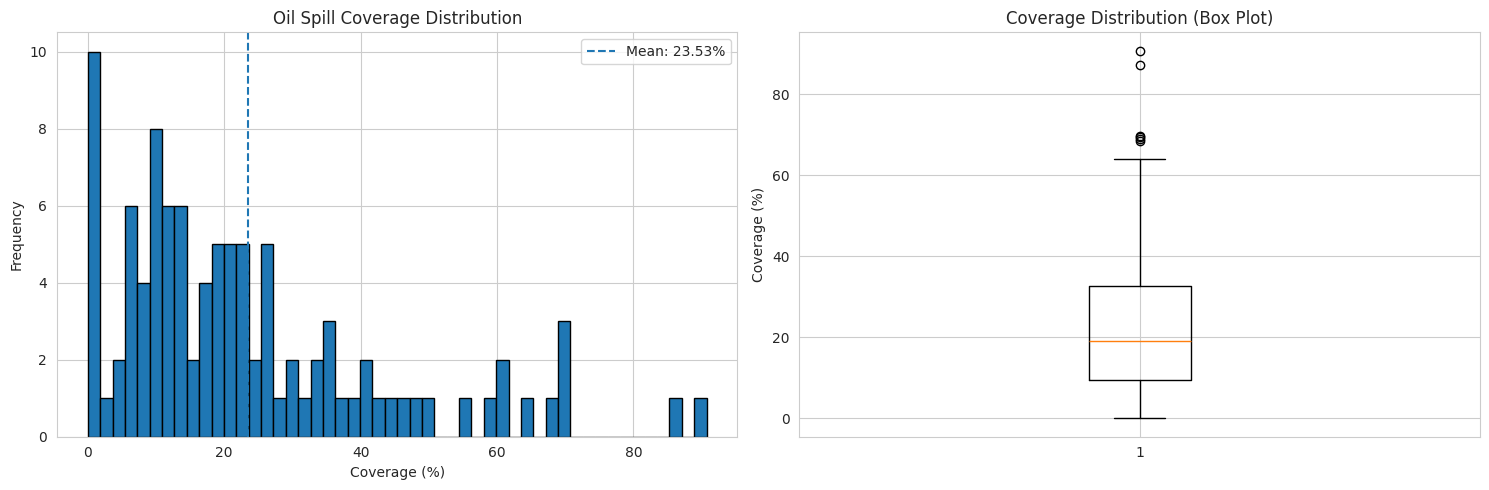


📊 Image-level balance:
   With oil: 96.0%
   Without oil: 4.0%

📊 Pixel-level balance (critical for training):
   Oil pixels: 23.5267%
   Background pixels: 76.4733%

✓ Mask statistics saved to mask_statistics.csv


In [10]:
if TRAIN_MASKS.exists():
    mask_files = list(TRAIN_MASKS.glob('*.png'))

    if len(mask_files) == 0:
        print("⚠ No mask files found.")
    else:
        mask_stats = []
        coverage_percentages = []

        total_oil_pixels = 0
        total_pixels_all = 0

        print("Analyzing mask properties...")
        sample_size = min(100, len(mask_files))
        sampled_masks = np.random.choice(mask_files, sample_size, replace=False)

        for mask_path in tqdm(sampled_masks, desc="Processing masks"):
            mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
            if mask is None:
                continue

            unique_vals = np.unique(mask)

            total_pixels = mask.size
            oil_pixels = np.sum(mask > 0)
            coverage = (oil_pixels / total_pixels) * 100

            total_oil_pixels += oil_pixels
            total_pixels_all += total_pixels
            coverage_percentages.append(coverage)

            mask_stats.append({
                'Filename': mask_path.name,
                'Unique_Values': unique_vals.tolist(),
                'Oil_Coverage_%': coverage,
                'Has_Oil': oil_pixels > 0
            })

        df_masks = pd.DataFrame(mask_stats)

        print("\n" + "="*70)
        print("MASK ANALYSIS SUMMARY")
        print("="*70)
        print(f"Total masks analyzed: {len(df_masks)}")
        print(f"Masks with oil spills: {df_masks['Has_Oil'].sum()}")
        print(f"Masks without oil: {(~df_masks['Has_Oil']).sum()}")

        print(f"\nAverage oil coverage: {df_masks['Oil_Coverage_%'].mean():.2f}%")
        print(f"Median oil coverage: {df_masks['Oil_Coverage_%'].median():.2f}%")
        print(f"Max oil coverage: {df_masks['Oil_Coverage_%'].max():.2f}%")
        print(f"Min oil coverage: {df_masks['Oil_Coverage_%'].min():.2f}%")

        # Visualize coverage distribution
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        axes[0].hist(coverage_percentages, bins=50, edgecolor='black')
        axes[0].set_title('Oil Spill Coverage Distribution')
        axes[0].set_xlabel('Coverage (%)')
        axes[0].set_ylabel('Frequency')
        axes[0].axvline(np.mean(coverage_percentages), linestyle='--',
                        label=f"Mean: {np.mean(coverage_percentages):.2f}%")
        axes[0].legend()

        axes[1].boxplot(coverage_percentages, vert=True)
        axes[1].set_title('Coverage Distribution (Box Plot)')
        axes[1].set_ylabel('Coverage (%)')

        plt.tight_layout()
        plt.show()

        # Image-level balance
        print("\n📊 Image-level balance:")
        img_ratio = df_masks['Has_Oil'].mean()
        print(f"   With oil: {img_ratio*100:.1f}%")
        print(f"   Without oil: {(1-img_ratio)*100:.1f}%")

        # Pixel-level balance (MOST IMPORTANT)
        pixel_ratio = total_oil_pixels / total_pixels_all
        print("\n📊 Pixel-level balance (critical for training):")
        print(f"   Oil pixels: {pixel_ratio*100:.4f}%")
        print(f"   Background pixels: {(1-pixel_ratio)*100:.4f}%")

        if pixel_ratio < 0.1:
            print("   ⚠ Severe pixel imbalance → Dice / Focal loss required")

        df_masks.to_csv("/kaggle/working/mask_statistics.csv", index=False)
        print("\n✓ Mask statistics saved to mask_statistics.csv")

else:
    print("⚠ Training masks not found.")


---
## 9. Image-Mask Overlay Visualization

Visualize how well masks align with actual oil spills.

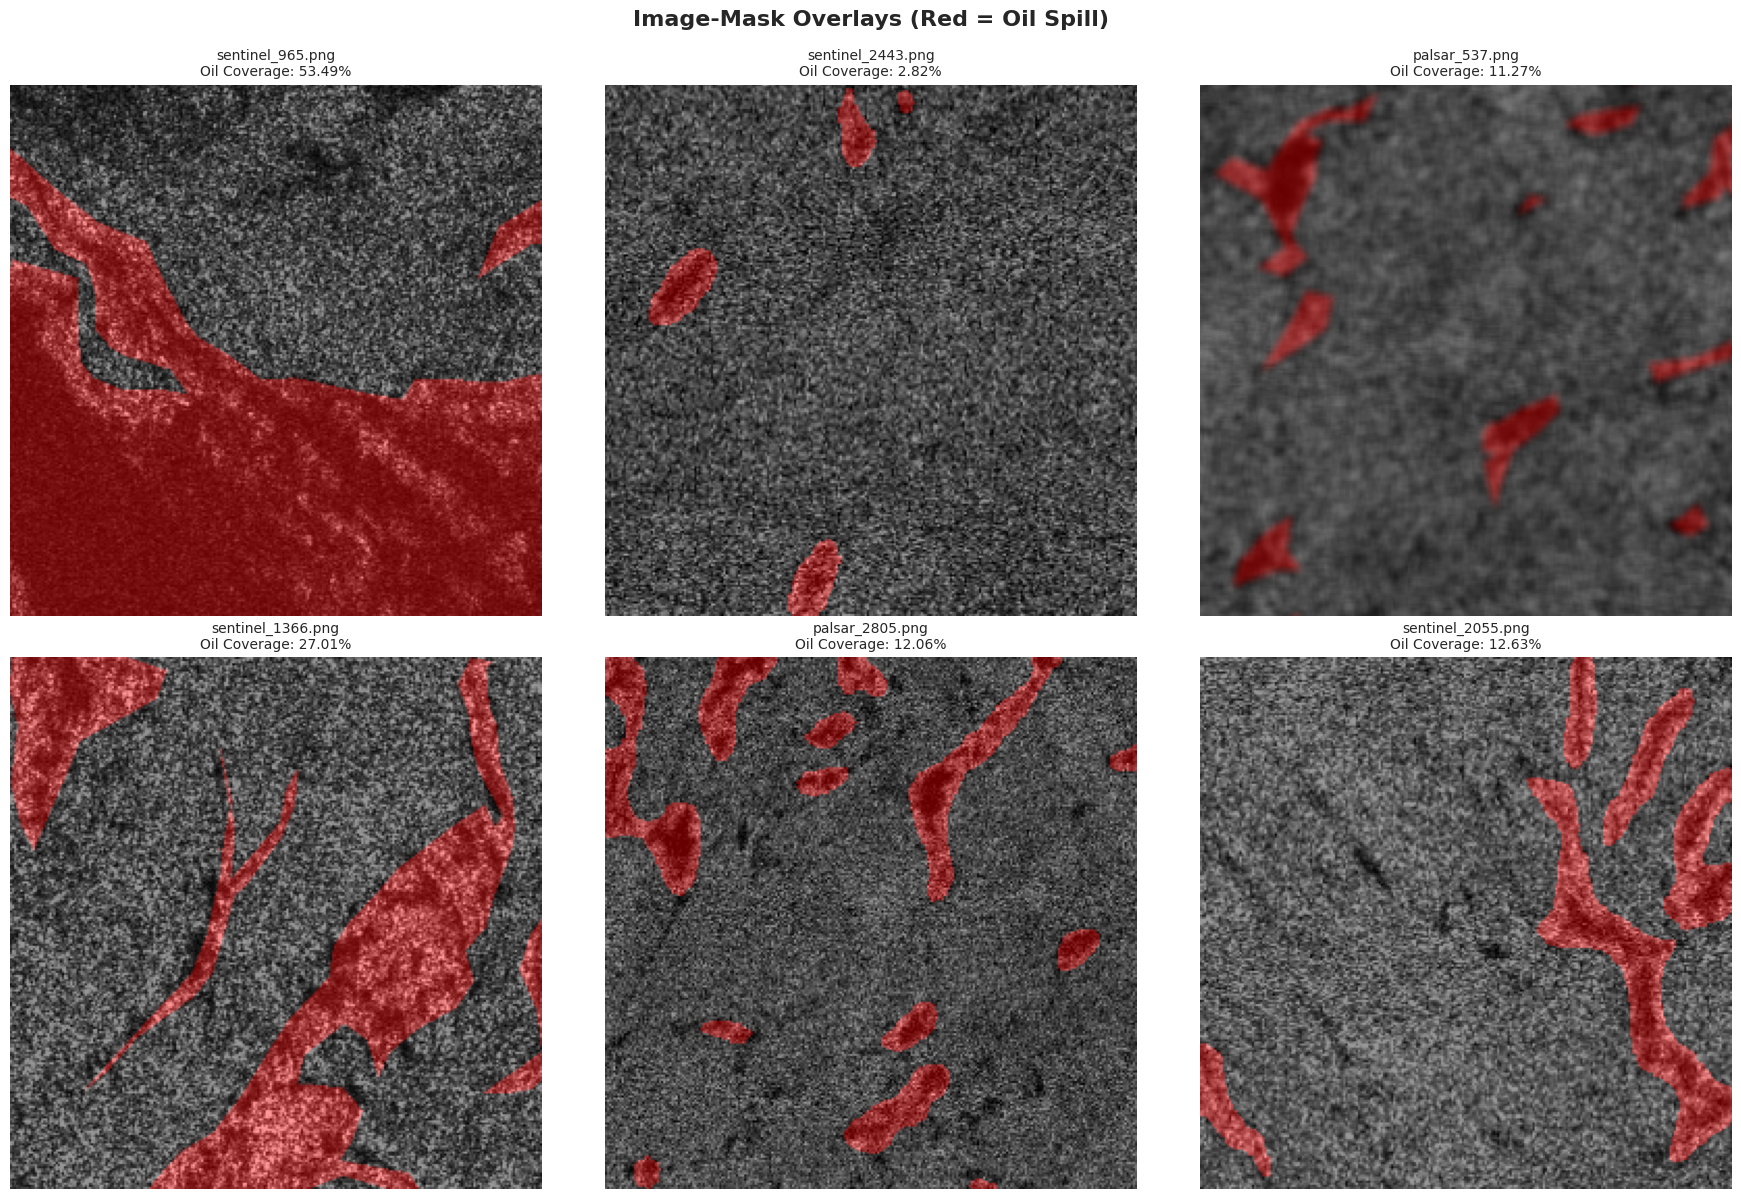


🔴 Red highlighted areas indicate detected oil spills


In [11]:
# Create overlays for better understanding

if TRAIN_IMAGES.exists() and TRAIN_MASKS.exists():
    image_files = list(TRAIN_IMAGES.glob('*.jpg')) + list(TRAIN_IMAGES.glob('*.jpeg'))+ list(TRAIN_IMAGES.glob('*.png'))
    
    # Select 6 random samples
    if len(image_files) >= 6:
        random_indices = np.random.choice(len(image_files), 6, replace=False)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()
        
        for idx, img_idx in enumerate(random_indices):
            img_path = image_files[img_idx]
            mask_path = TRAIN_MASKS / f"{img_path.stem}.png"
            
            if mask_path.exists():
                # Load image and mask
                img = cv2.imread(str(img_path))
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
                
                # Create overlay
                overlay = img_rgb.copy()
                red_mask = np.zeros_like(img_rgb)
                red_mask[:, :, 0] = mask  # Red channel
                overlay = cv2.addWeighted(overlay, 0.6, red_mask, 0.4, 0)
                
                # Calculate coverage
                coverage = (np.sum(mask > 0) / mask.size) * 100
                
                axes[idx].imshow(overlay)
                axes[idx].set_title(f'{img_path.name}\nOil Coverage: {coverage:.2f}%', fontsize=10)
                axes[idx].axis('off')
        
        plt.suptitle('Image-Mask Overlays (Red = Oil Spill)', fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()
        
        print("\n🔴 Red highlighted areas indicate detected oil spills")
else:
    print("⚠ Images or masks not found.")

---
## 10. Speckle Noise Inspection

SAR images typically contain speckle noise. Let's zoom in to observe it.

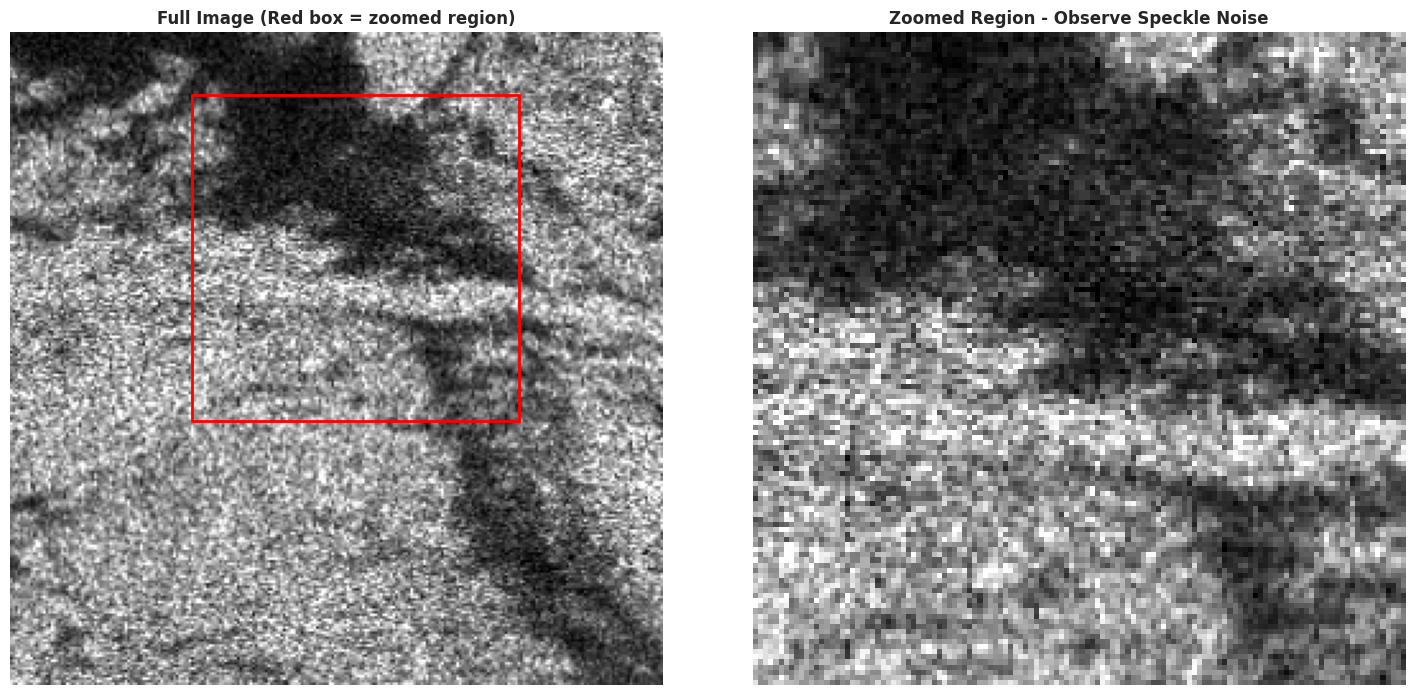


🔍 Speckle Noise Characteristics:
  - Granular 'salt-and-pepper' appearance
  - Inherent to SAR imaging technology
  - Will be addressed in preprocessing (Notebook 3)
  - Common filters: Median, Gaussian, Bilateral


In [12]:
# Zoom into a region to observe speckle noise
if TRAIN_IMAGES.exists():
    image_files = list(TRAIN_IMAGES.glob('*.jpg')) + list(TRAIN_IMAGES.glob('*.jpeg')) + list(TRAIN_IMAGES.glob('*.png'))
    
    if image_files:
        # Load a random image
        img_path = np.random.choice(image_files)
        img = cv2.imread(str(img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Select a random region
        h, w = img_rgb.shape[:2]
        crop_size = 128
        x = np.random.randint(0, w - crop_size)
        y = np.random.randint(0, h - crop_size)
        
        cropped = img_rgb[y:y+crop_size, x:x+crop_size]
        
        # Display
        fig, axes = plt.subplots(1, 2, figsize=(15, 7))
        
        axes[0].imshow(img_rgb)
        axes[0].add_patch(plt.Rectangle((x, y), crop_size, crop_size, 
                                       fill=False, edgecolor='red', linewidth=2))
        axes[0].set_title('Full Image (Red box = zoomed region)', fontsize=12, fontweight='bold')
        axes[0].axis('off')
        
        axes[1].imshow(cropped)
        axes[1].set_title('Zoomed Region - Observe Speckle Noise', fontsize=12, fontweight='bold')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print("\n🔍 Speckle Noise Characteristics:")
        print("  - Granular 'salt-and-pepper' appearance")
        print("  - Inherent to SAR imaging technology")
        print("  - Will be addressed in preprocessing (Notebook 3)")
        print("  - Common filters: Median, Gaussian, Bilateral")
else:
    print("⚠ Training images not found.")

---
## 11. Summary and Key Findings

### What We Discovered:

1. **Image Characteristics**:
   - Analyzed pixel intensity distributions
   - Identified mean, std deviation, and range of values
   - Observed speckle noise typical of SAR imagery

2. **Mask Properties**:
   - Binary masks with 0 (background) and 255 (oil spill) values
   - Oil spill coverage varies across images
   - Some images have no oil spills (negative samples)

3. **Dataset Balance**:
   - Checked ratio of positive to negative samples
   - Important for training strategy

4. **Quality Observations**:
   - Image dimensions consistency
   - Presence of noise requiring preprocessing
   - Variation in lighting and contrast

### Insights for Next Steps:

**Preprocessing Needs (Notebook 3)**:
- ✅ Resize all images to standard size (256x256)
- ✅ Normalize pixel values to [0, 1]
- ✅ Apply noise reduction filters
- ✅ Data augmentation to increase dataset size

**Training Considerations**:
- Use class weights if dataset is imbalanced
- Implement data augmentation for better generalization
- Monitor both loss and accuracy metrics

---

**End of Notebook 2** ✓

**Next**: Notebook 3 - Preprocessing